# User Manual (Jupyter Lab Only)





### Basic Information
- To run this notebook some dependencies need to be installed which is done automatically
          - note: PyTorch should be installed manually 
- The data is automatically downloaded from Roboflow
- The epochs can be reduced for lower end GPU or if no GPU available
- This notebook was designed for use on Jupyter Notebook but should also work on Google Collab except the webcam part at end

### Errors
- Dataset not found (mostly occurs if working in google collab)
    -fix : 1) Open data.yaml file from data folder downloaded from roboflow
           2) Edit the path to train images to current directory
           3) Eg: /Desktop/Data/train/images   to  C:\user\abc\Desktop\Data\train\images
           4) Follow the same procedure for validate as well 
- Webcam error
    -fix : 1) Make sure you are running in jupyter notebook.
           2) Make sure the browser has allowed access to the webcam.
- Displaying result section error
    -fix : 1) Please check the path to image of confusion matrix
           2) Path is normally  yolov5/runs/train/exp/results.png
- Custom loading error
    -fix : 1) Mostly due to wrong path 
           2) Path is \yolov5\runs\train\exp\weights\last.pt  (you can use best part if the model is trained multiple times)

# Real Time Face Mask Detection Using YOLOv5

## 1) Cloning and Installation

In [ ]:
!git clone https://github.com/ultralytics/yolov5

In [ ]:
!cd yolov5 & pip install -r requirements.txt
!pip3 install -q roboflow
!pip3 install wandb

## 2) Importing Libraries

In [ ]:
import os
import torch
from roboflow import Roboflow
from matplotlib import pyplot as plt
import numpy as np
import cv2
import warnings
warnings.filterwarnings('ignore')

## 3) Reading and Downloading Dataset from Roboflow

In [ ]:
rf = Roboflow(model_format="yolov5", notebook="ultralytics") # using yolov5s model

#Downloading data from roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="NTBVpXsvtvRhuLo2VfSx")
project = rf.workspace().project("samsung-ai")
dataset = project.version(2).download("yolov5")


## 4) Exploring Classes

In [ ]:
#exploring the classes
!cat SAMSUNG-AI-2/data.yaml

cat: SAMSUNG-AI-2/data.yaml: No such file or directory


## 5) Custom Training

In [ ]:
#Data all ready trained using 300 epochs
#!python yolov5/train.py --img 416 --batch 16 --epoch 200 --data SAMSUNG-AI-2/data.yaml --weights yolov5s.pt 

## 6) Loading Custom Model

In [ ]:
model = torch.hub.load('ultralytics/yolov5','custom', path=r"C:\Users\azana\Desktop\Samsung\yolov5\runs\train\exp2\weights\last.pt")   #use force_reload= True to use latest train

## 7) Testing with Image

In [ ]:
# random image test 
result2=model('https://els-jbs-prod-cdn.jbs.elsevierhealth.com/cms/attachment/9c16ecff-88df-41ea-a511-105cfcba8c38/fx1_lrg.jpg')

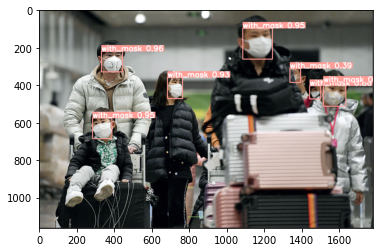

None


In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(result2.render()))
print(plt.show())

## 8) Display Results & Precision


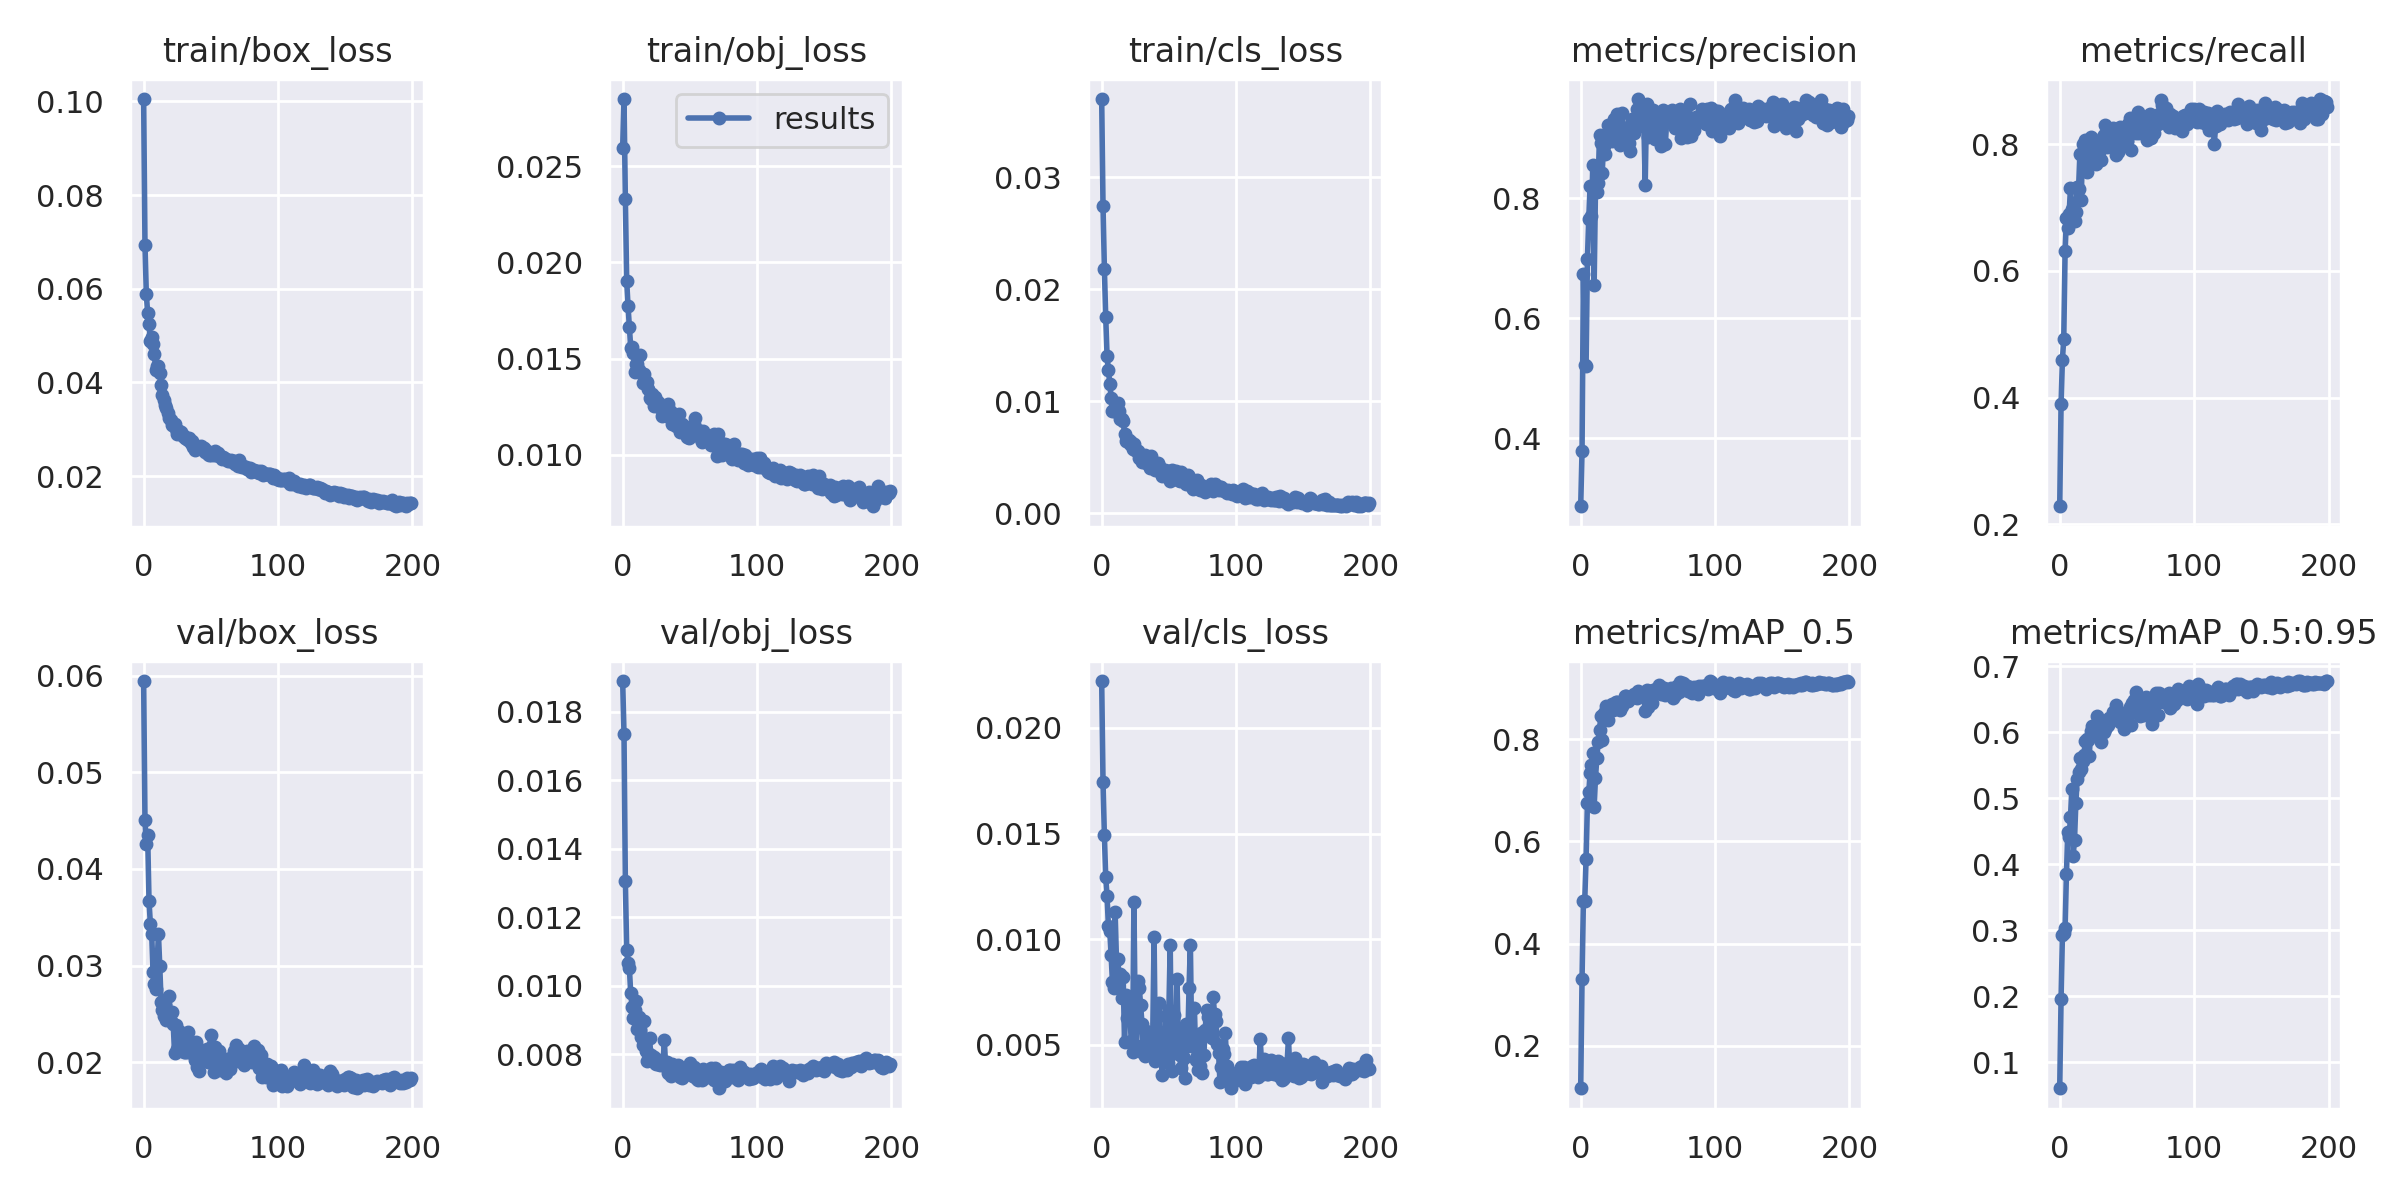

In [ ]:
from IPython.display import Image
Image(filename=r"C:\Users\azana\Desktop\Samsung\yolov5\runs\train\exp2\results.png",width = 600, height = 300) 

### Confusion Matrix

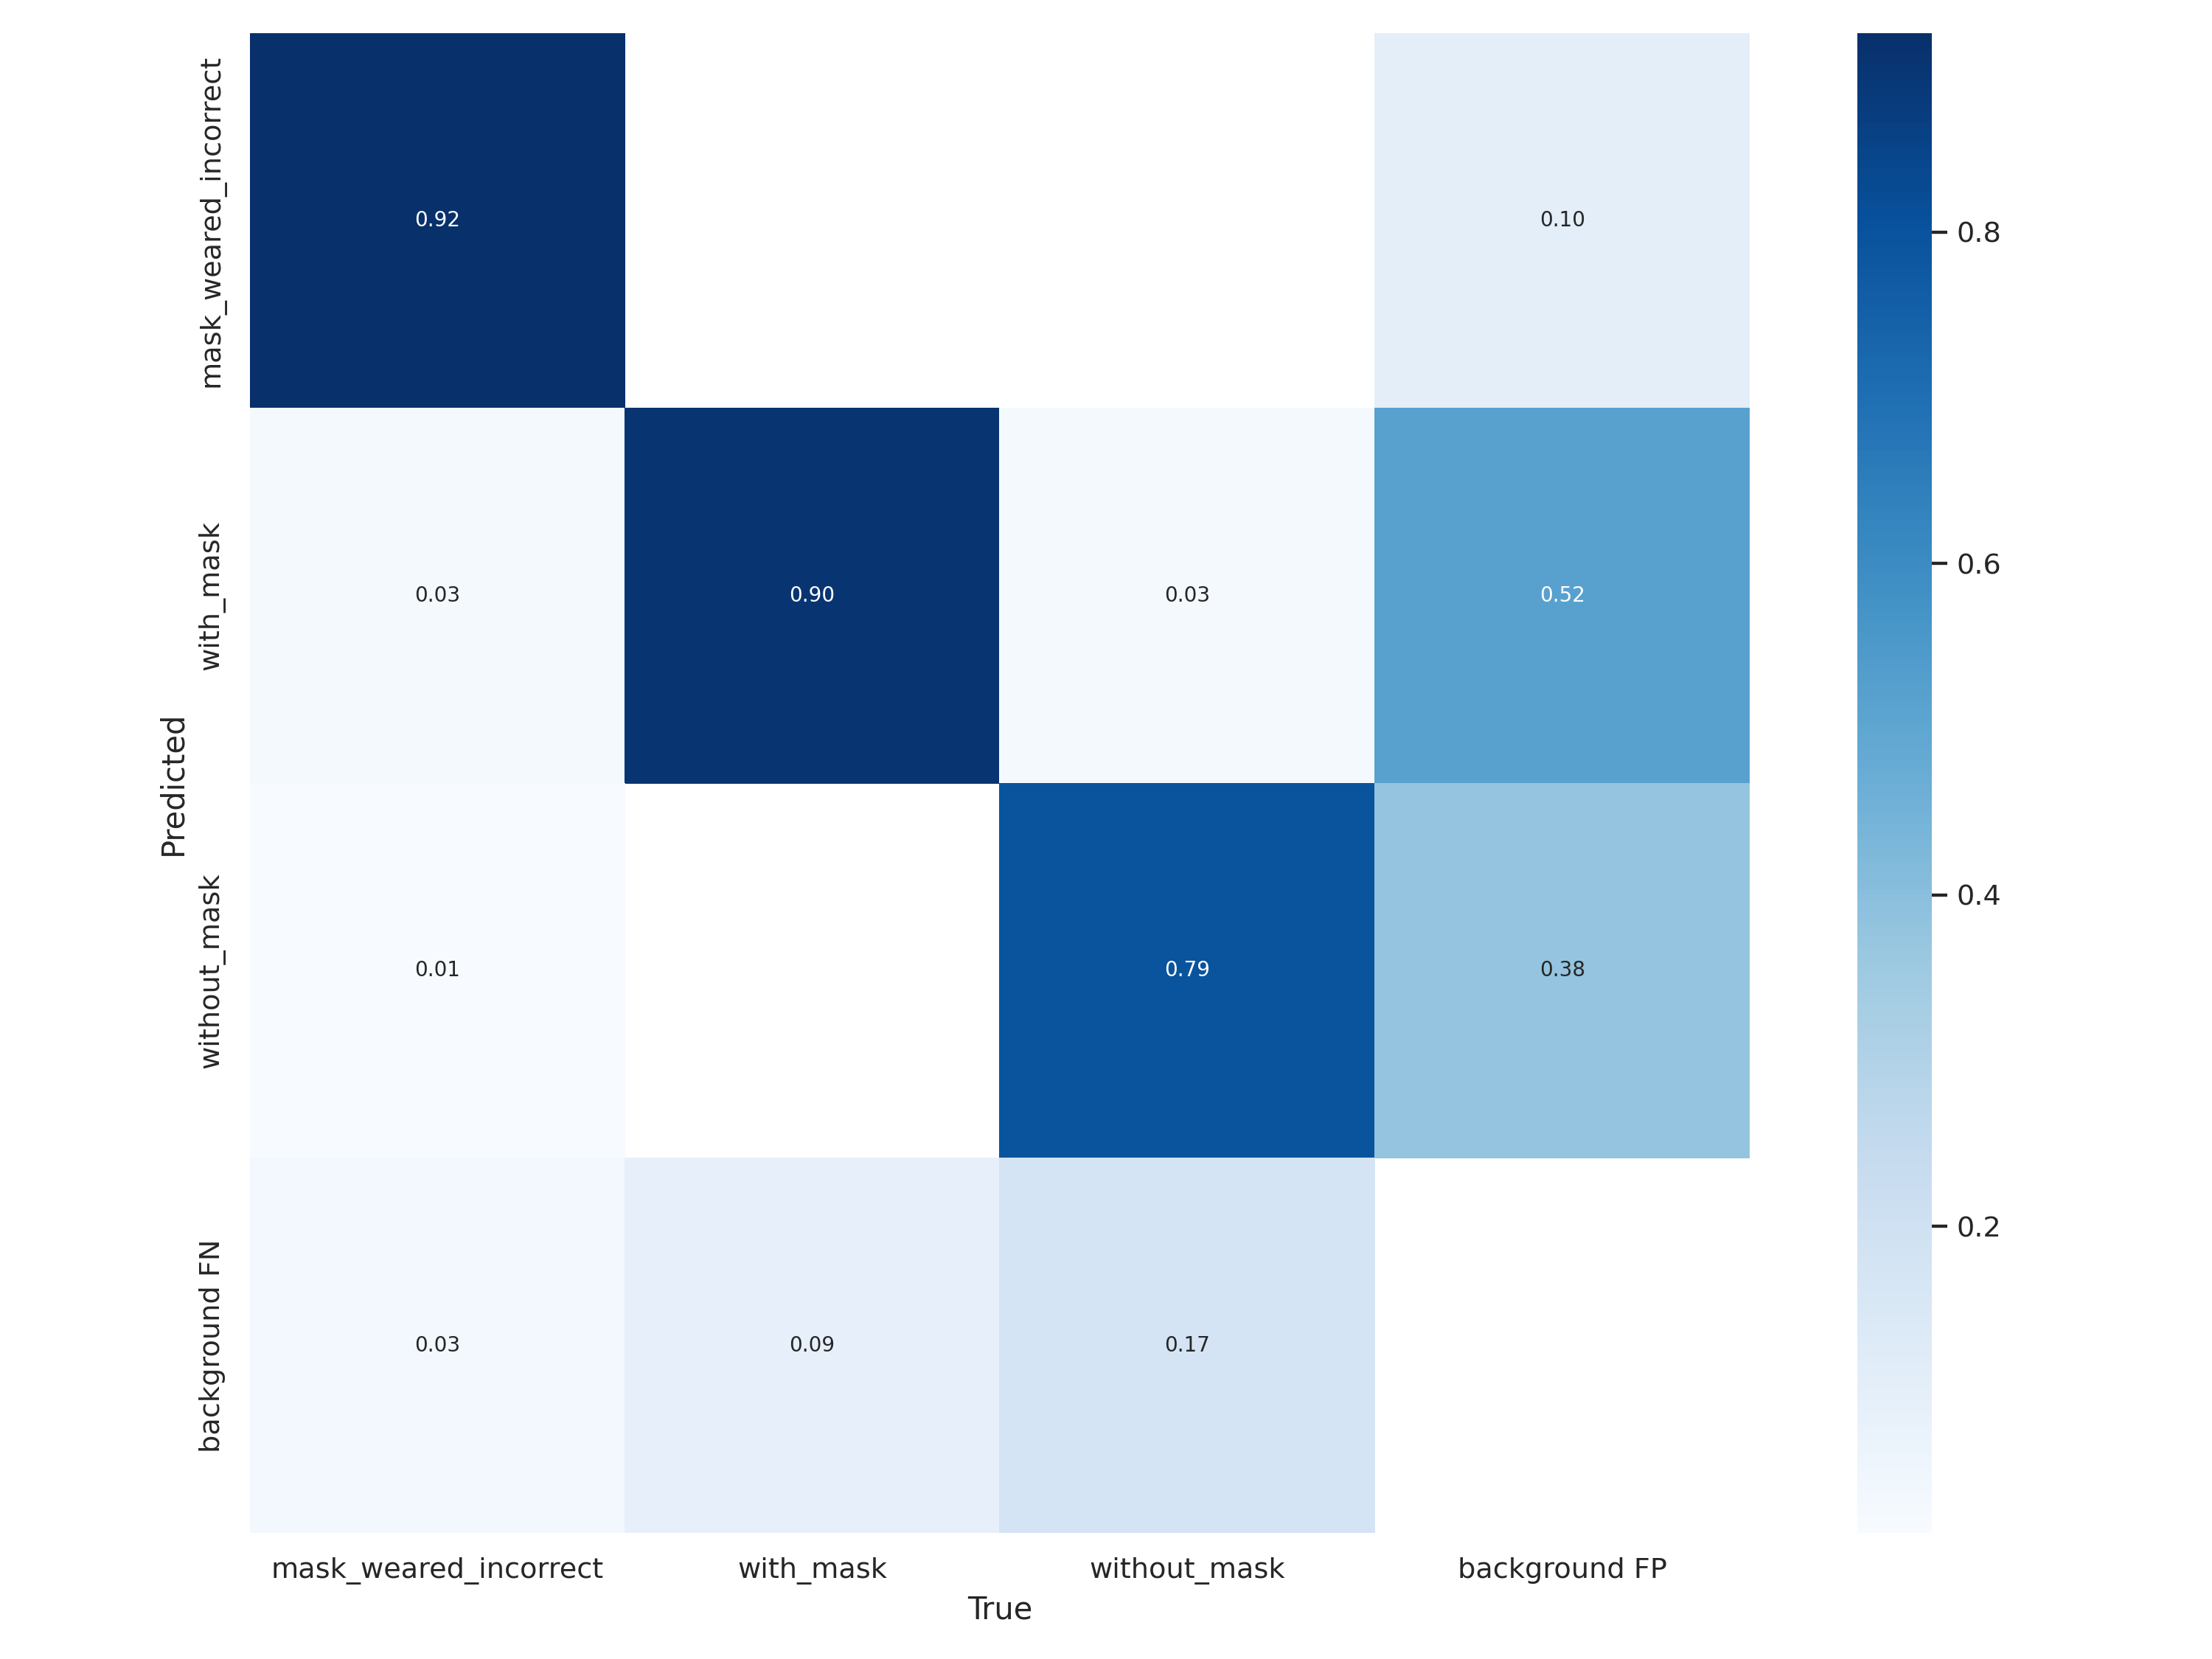

In [ ]:
Image(filename=r"C:\Users\azana\Desktop\Samsung\yolov5\runs\train\exp2\confusion_matrix.png",width = 600, height = 300)

## 9) Real Time Implementation

In [ ]:
cap= cv2.VideoCapture(0)  
while cap.isOpened():
    ret, frame= cap.read()    
    results=model(frame)
    cv2.imshow('MASK DETECTOR',np.squeeze(results.render())) 
    if cv2.waitKey(10) & 0xFF == ord('q'): 
        break
cap.release()
cv2.destroyAllWindows() 